# Matrix Analysis 2022 - EE312

## Week 3 - Signal restoration using projections
[LTS2](https://lts2.epfl.ch)

### 1. Low-pass filter

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 100
k = np.arange(0, N)
w =  10
W_hat = F = np.exp(2j*np.pi*np.outer(k, k)/N)/np.sqrt(N)
# build P
P = np.eye(N)
P[w:N-w+1, w:N-w+1] = 0 # be careful with indices, otherwise you end up with a non-real filtered output

In [6]:
P@P - P

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

$P$ is a projection, since $P^2=P$ (any diagonal matrix with only 0s and 1s on its diagonal would satisfy this)

In [51]:
w1 = 3
w2 = 7
w3 = 12

# generate simple signals
x1 = np.cos(2*w1*np.pi*k/N) + np.sin(2*w2*np.pi*k/N)
x2 = np.sin(2*w1*np.pi*k/N) + np.cos(2*w3*np.pi*k/N)

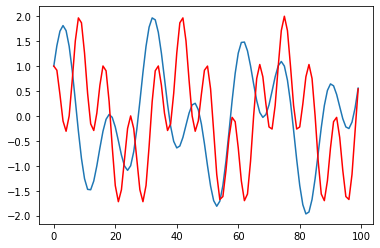

In [52]:
plt.plot(x1)
plt.plot(x2, 'r')

In [53]:
# Try the filtering on the test signals and make sure it behaves appropriately
X1 = W_hat@x1
X2 = W_hat@x2
x1_f = np.conjugate(W_hat.T)@P@X1
x2_f = np.conjugate(W_hat.T)@P@X2

In [56]:
x1_f[0:10] # check imaginary part

array([ 1.        -2.04411141e-15j,  1.40806654-4.85538589e-15j,
        1.70028973-6.67589219e-15j,  1.81291109-7.49876465e-15j,
        1.71125588-7.17621797e-15j,  1.39680225-4.72677457e-15j,
        0.90753297-4.04290719e-15j,  0.31148041-2.75493469e-15j,
       -0.30533403-6.21733284e-16j, -0.85430186+2.97224792e-15j])

In [57]:
x2_f[0:10]

array([-4.60395611e-16+4.38846008e-15j,  1.87381315e-01+4.05886545e-15j,
        3.68124553e-01+3.24073749e-15j,  5.35826795e-01+2.69291020e-15j,
        6.84547106e-01+1.64569716e-15j,  8.09016994e-01+1.83579156e-15j,
        9.04827052e-01+1.08730858e-15j,  9.68583161e-01-1.13227309e-15j,
        9.98026728e-01+2.04090281e-16j,  9.92114701e-01-1.87516258e-15j])

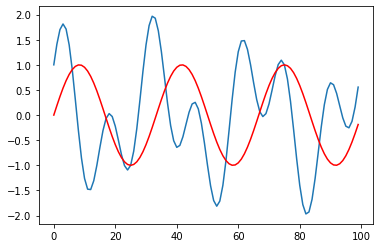

In [58]:
# Plot the filtered signals
# x1_f should still contain both frequencies, x2_f only one
plt.plot(np.real(x1_f))
plt.plot(np.real(x2_f), 'r')

### 2. Signal extension

In [7]:
# E will be any list of indices, e.g. for N=5, a suitable E could be [1, 3]
def Bt_E(N, M, E):
    B = np.eye((N+M))
    # TODO check for out of bounds indices
    # coefficients on the diagonal having indices in E should be zeroed
    for p in zip(E, E):
        B[p] = 0.
    return B

In [8]:
# E will be any list of indices, e.g. for N=5, a suitable E could be [1, 3]
def C_E(N, M, E):
    c = np.eye(N+M)
    for p in zip(range(M), E):
        c[p[1], N+p[0]] = 1.
    return c

In [9]:
# Small test
N=5
E=[1,3]
M=2

In [11]:
Bt_E(N,M,E)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [12]:
C_E(N, M, E)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [14]:
D_E = C_E(N, M, E)@Bt_E(N,M,E)
D_E

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

The effect of $D_E$ is to replace values by the known values.

In [15]:
D_E@D_E - D_E # D_E is a projector

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

### 3. Extended signals in the Fourier domain
$\tilde{W}$ is orthonormal: it is block-diagonal and each block is orthonormal. It is then fairly easy to check that $\tilde{W}\tilde{W}^H=I$. 

In [16]:
def Wt_E(N, M, E):
    k = np.arange(0, N)
    W_hat = F = np.exp(2j*np.pi*np.outer(k, k)/N)/np.sqrt(N)
    W_tilde = np.zeros((N+M, N+M), dtype=complex)
    W_tilde[:N, :N] = W_hat
    W_tilde[N:, N:] = np.eye(M)
    return W_tilde

In [17]:
def Pt_E(N, M, w):
    P = np.eye(N+M) # initialize with an all-pass filter
    P[w:N-w+1, w:N-w+1] = 0
    return P

$\tilde{W}^H \tilde{P}\tilde{W}$ is a projection since

$\tilde{W}^H \tilde{P}\tilde{W}\tilde{W}^H \tilde{P}\tilde{W} = \tilde{W}^H \tilde{P}\tilde{P}\tilde{W}$ (grouping the middle term $\tilde{W}\tilde{W}^H=I$)

Since $\tilde{P}$ is a projection, this is equal to $\tilde{W}^H \tilde{P}\tilde{W}$.

### 4. Signal restoration

In [18]:
# Setup an example
N = 100
w = 10 # cut-off
w1 = 3
w2 = 7
E =  np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
# E =  np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90]) # try with less known points
M = len(E)
x = np.cos(2*w1*np.pi*np.arange(0, N)/N) + np.sin(2*w2*np.pi*np.arange(0,N)/N) # original signal
y = np.random.rand(N)
y[E] = x[E] # restore known values
xe = x[E]

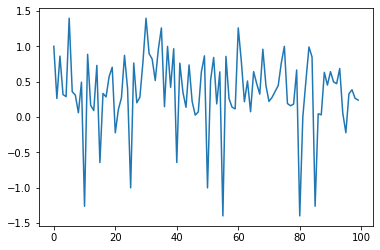

In [19]:
plt.plot(y) # plot the "acquired" signal

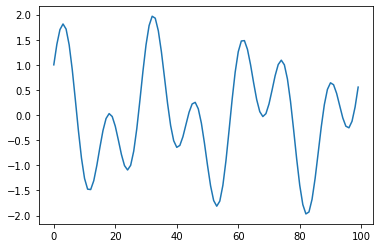

In [20]:
plt.plot(x) # plot the ground truth signal

In [21]:
yt = np.zeros(N+M)
yt[:N] = y
yt[N:] = xe

In [47]:
def restoration_iter(Wt, Pt, Dt, xt):
    # project in fourier
    X = Wt@xt
    z = np.conjugate(Wt.T)@(Pt@X)
    # restore known values
    xr = Dt@z
    return np.real(xr)

In [48]:
def signal_restore(Wt, Pt, Dt, yt, niter=20):
    yr0 = yt # initialize
    for k in range(niter):
        yr1 = restoration_iter(Wt, Pt, Dt, yr0)
        yr0 = yr1
    return yr1

In [49]:
Wt = Wt_E(N, M, E)
Dt = C_E(N, M, E)@Bt_E(N, M, E)
Pt = Pt_E(N, M, w)
yr = signal_restore(Wt, Pt, Dt, yt)

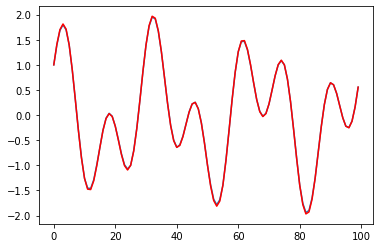

In [50]:
plt.plot(yr[:N]) # plot reconstructed signal
plt.plot(x, 'r') # plot original for comparison